In [ ]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATA_PATH = '/home/kal/Documents/codeprojects/Unsupervised_Learning/data/Mall_Customers.csv'

EPSI = 10
MIN_POINTS = 3

In [ ]:
df = pd.read_csv(DATA_PATH)


In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.Gender.replace('Male', 0, inplace=True)
df.Gender.replace('Female', 1, inplace=True)

/tmp/ipykernel_7479/3012949194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Gender.replace('Male', 0, inplace=True)
/tmp/ipykernel_7479/3012949194.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


/tmp/ipykernel_7479/2340435089.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Gender, ax=axes[0, 0])
/tmp/ipykernel_7479/2340435089.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age, ax=axes[0, 1])
/tmp/ipykernel_7479/2340435089.py:5: UserWarning: 

`distplot` is a deprecated fu

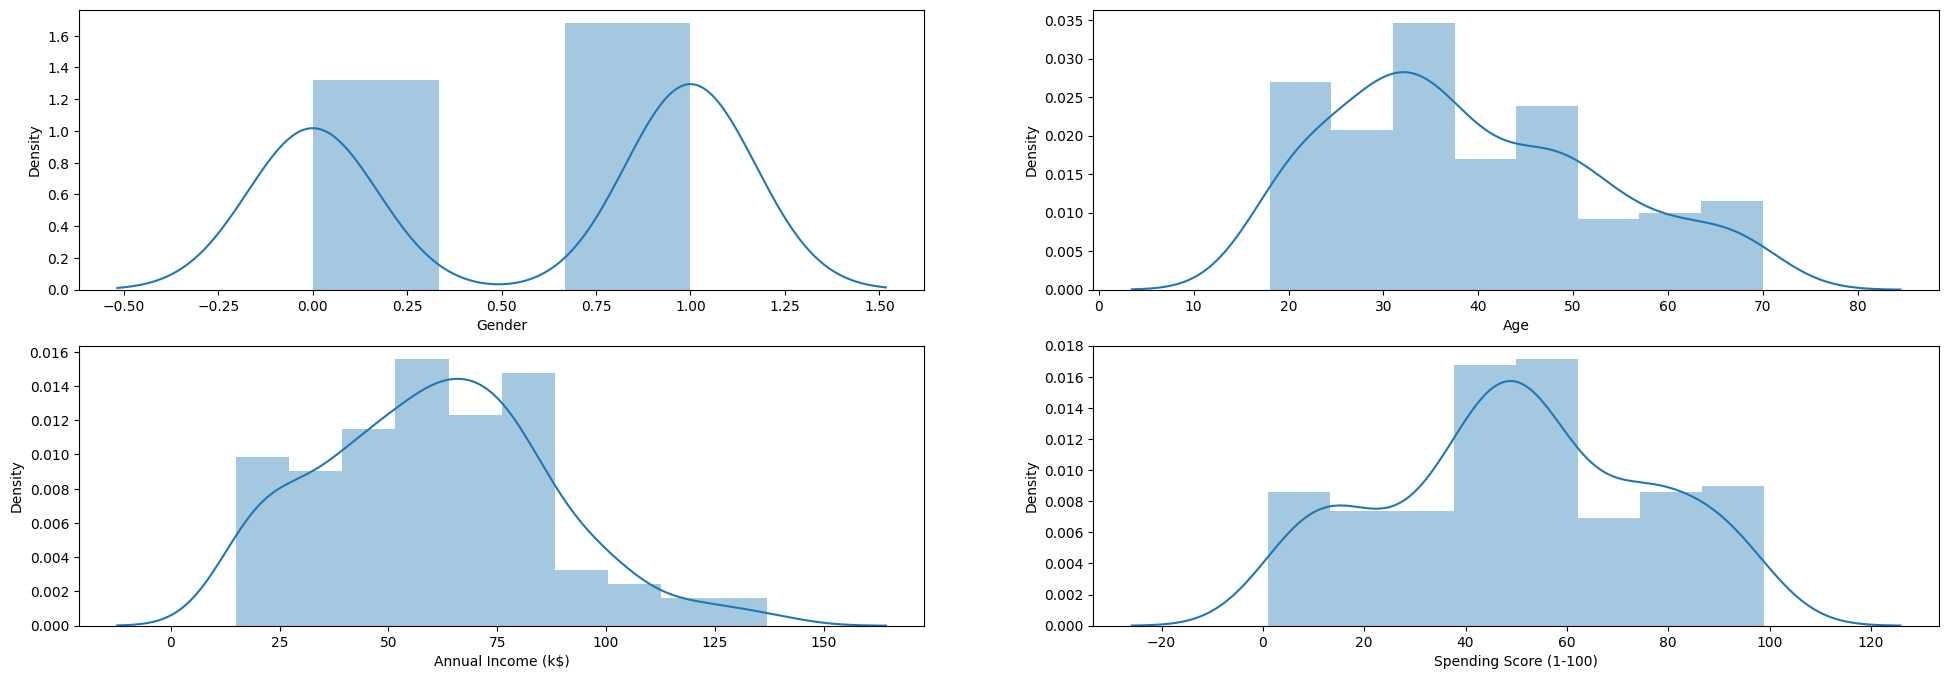

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(24, 8))

sns.distplot(df.Gender, ax=axes[0, 0])
sns.distplot(df.Age, ax=axes[0, 1])
sns.distplot(df['Annual Income (k$)'], ax=axes[1, 0])
sns.distplot(df['Spending Score (1-100)'], ax=axes[1, 1])
plt.show()

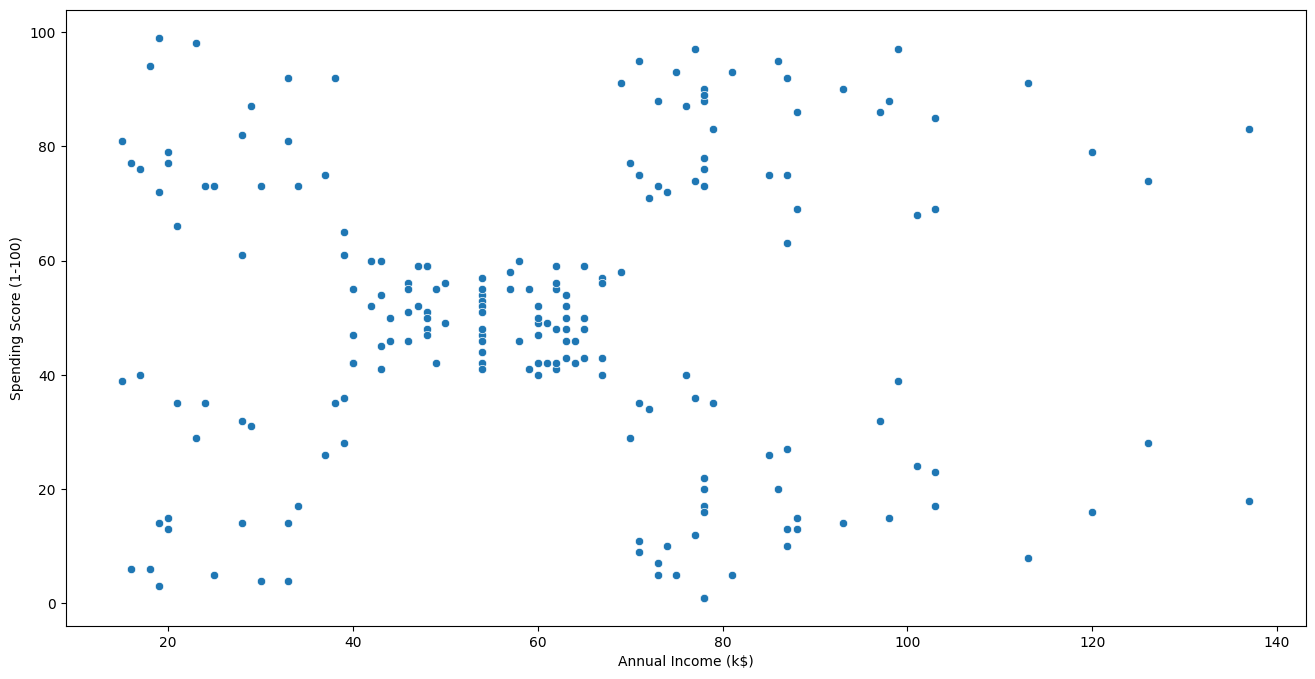

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(data=df, x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], ax=ax)
plt.show()

In [ ]:
class Point(object):
    def __init__(self, coordinate):
        self.coordinate = coordinate
        self.cluster_idx = None

    def is_clustered(self):
        return self.cluster_idx is not None

    def cluster(self, cluster_idx):
        self.cluster_idx = cluster_idx


class DBSCAN(object):
    def __init__(self, epsi, min_points):
        self.epsi = epsi
        self.min_points = min_points

    @staticmethod
    def _compute_distance(x1, x2):
        return np.sum((x1 - x2)**2)**0.5

    def _find_neighbor_indices(self, core_point, other_points):
        neighbor_indices = []

        for idx in range(len(other_points)):
            if self._compute_distance(core_point.coordinate, other_points[idx].coordinate) <= self.epsi:
                neighbor_indices.append(idx)

        return neighbor_indices

    def fit(self, df, feature_cols=['Annual Income (k$)', 'Spending Score (1-100)']):
        points = []
        for idx, row in df.loc[:, feature_cols].iterrows():
            points.append(Point(row.to_numpy()))

        free_point_indices = set(range(len(points)))

        core_point_indices = set()
        cluster_count = 0

        while len(free_point_indices) > 0:
            if len(core_point_indices) == 0:
                start_idx = random.choice(list(free_point_indices))
                core_point_indices.add(start_idx)
                free_point_indices.remove(start_idx)
                points[start_idx].cluster(cluster_count)

            while len(core_point_indices) > 0:
                picked_core_point_idx = core_point_indices.pop()

                neighbor_indices = self._find_neighbor_indices(points[picked_core_point_idx], points)

                if len(neighbor_indices) >= (self.min_points - 1):
                    for neighbor_idx in neighbor_indices:
                        if neighbor_idx in free_point_indices:
                            points[neighbor_idx].cluster(cluster_count)
                            if neighbor_idx in free_point_indices:
                                core_point_indices.add(neighbor_idx)
                                free_point_indices.remove(neighbor_idx)

            cluster_count += 1

        return points

In [ ]:
model = DBSCAN(epsi=EPSI, min_points=MIN_POINTS)


In [ ]:
points = model.fit(df)


In [ ]:
x = []
y = []
cluster = []

for point in points:
    _x, _y = point.coordinate
    x.append(_x)
    y.append(_y)
    cluster.append(point.cluster_idx)

In [ ]:
new_df = pd.DataFrame({
    'Annual Income (k$)': x,
    'Spending Score (1-100)': y,
    'cluster': cluster
})

In [ ]:
new_df

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0
...,...,...,...
195,120,79,3
196,126,28,10
197,126,74,3
198,137,18,8


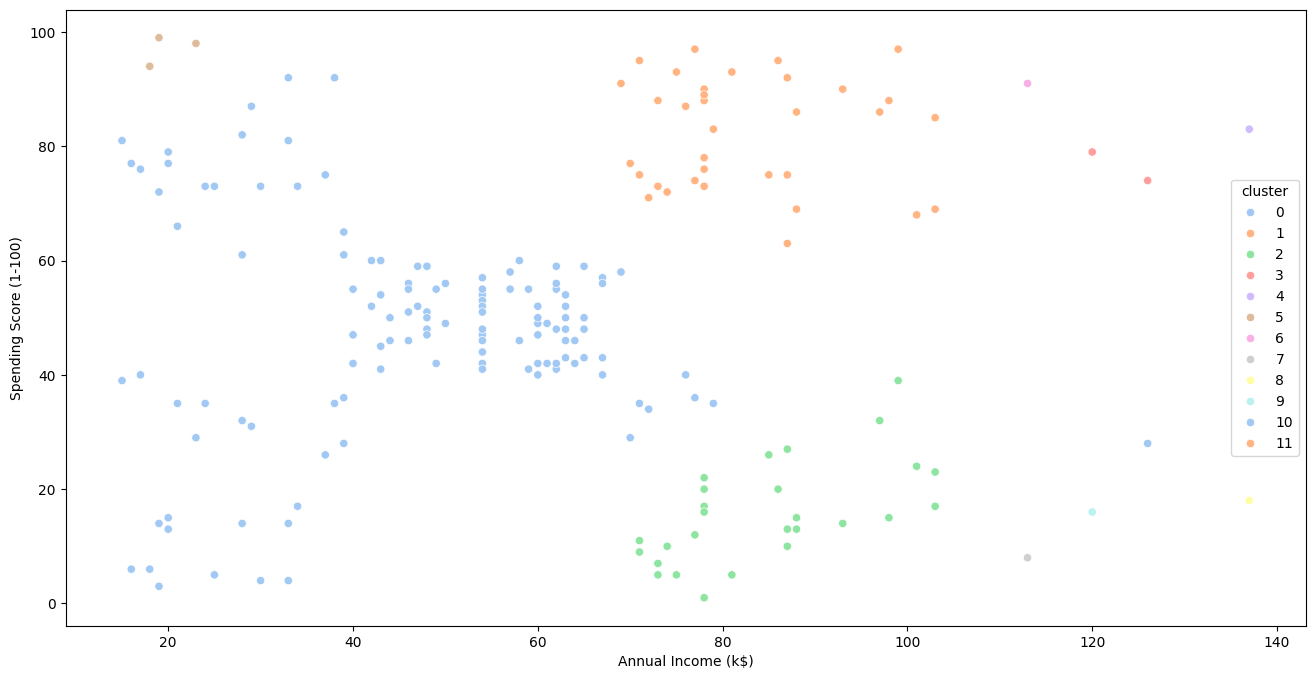

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(data=new_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='pastel', ax=ax)
plt.show()